## Project 1: Data import and cleaning for the use case of agricultural production and weather data of goods in Portugal

The data of agricultural good production is published from the national institute of statistics in Portugal and can be accessed through their website (http://www.ine.pt). The data was collected during the period of 1986-2021 in nine different geographic locations (PT (total), Continente, Norte, Centro, Lisboa, Alentejo, Algarve, Acores, Madeira). Dimension used: data reference period, geographic location and species. Value metric is kg/ha.

The data of weather recording is taken from the Portuguese Institute of the Sea and Atmosphere (IPMA) from 16 different weather stations. Climatological stations have started recording on different dates, but they all collected the minimum temperature, the maximum temperature and the precipitation variability. The excels sheets also contain meta information about each weather station.

### 0. Notebook preparation

#### Import needed libraries for the project.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
print('You are using Pandas version', pd.__version__, '!')

You are using Pandas version 1.2.4 !


### 1. Data import of production data

#### Read-in production data with the correct header (year and product). Drop first row (unit metric) and last column (empty).

In [2]:
production_data = pd.read_csv('ine_principais_culturas_agricolas.csv', sep = ';', header = [4,6], nrows = 12, encoding = 'latin_1')
production_data = production_data.drop(labels = 0 ,axis = 0)
production_data = production_data.iloc[:,:-1]
production_data

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
5,17: Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110
6,18: Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,1305,4713,4777,x x,x x,x x,3948,772,1552,753
7,15: Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,1000,4947,2266,x x,x x,x x,8674,1980,774,2027
8,2: Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,- -,2936750,- -,x x,x x,x x,6750,- -,- -,- -
9,20: Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,- -,2936750,- -,x x,x x,x x,6750,- -,- -,- -


#### Extract region index and region name from first column, and set the row index to the specific region index. The region name may be used for mapping the region, but will be deleted after preparation.

In [3]:
region_Index_and_Name = [i.split(':') for i in production_data.iloc[:,0]]
region_Index = [i[0] for i in region_Index_and_Name]
region_Name = [i[1] for i in region_Index_and_Name]
production_data.index = region_Index
production_data.iloc[:,0] = region_Name
production_data

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
PT,Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
1,Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
11,Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
16,Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
17,Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110
18,Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,1305,4713,4777,x x,x x,x x,3948,772,1552,753
15,Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,1000,4947,2266,x x,x x,x x,8674,1980,774,2027
2,Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,- -,2936750,- -,x x,x x,x x,6750,- -,- -,- -
20,Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,- -,2936750,- -,x x,x x,x x,6750,- -,- -,- -


#### Clean up column index and add as a new MultiIndex (Year and Product).

In [4]:
column_index_year = production_data.columns.get_level_values(0).to_series()
column_index_year  = column_index_year.mask(column_index_year.apply(lambda i: i.startswith('Unnamed'))).ffill()
column_index_year[0] = ""
column_index_product = production_data.columns.get_level_values(1).to_series()
column_index_product[0] = ""
production_data.columns = pd.MultiIndex.from_arrays([column_index_year,column_index_product], names=('year', 'Product') )
production_data

year                                                2021                   \
Product                                Cereais para grão Trigo Trigo mole   
PT                            Portugal              5372  2342       2272   
1                           Continente              5373  2342       2272   
11                               Norte              3632  1689       1689   
16                              Centro              6609  1934       1893   
17        Área Metropolitana de Lisboa              7356  3803       3911   
18                            Alentejo              5386  2492       2425   
15                             Algarve              1609  1107       1071   
2           Região Autónoma dos Açores              2375   - -        - -   
20          Região Autónoma dos Açores              2375   - -        - -   
3           Região Autónoma da Madeira              2446  2002       2002   
30          Região Autónoma da Madeira              2446  2002       2002   

year                                                      ...  1986           \
Product Trigo duro Centeio Aveia Cevada Triticale  Milho  ... Avelã    Vinha   
PT            2734    1142  1213   2901      1467  10105  ...  1334     4199   
1             2734    1142  1213   2901      1467  10110  ...  1334     4124   
11             - -    1405   990    994      1511   5190  ...  1453     3853   
16            2460     712   858   3027      1087   9931  ...  1283     4153   
17            2955     - -  1490   3648      2298  13201  ...   555     4184   
18            2800     911  1307   2974      1483  13845  ...  1305     4713   
15            1254     641   863    902       811   9120  ...  1000     4947   
2              - -     - -   - -    - -       - -   2375  ...   - -  2936750   
20             - -     - -   - -    - -       - -   2375  ...   - -  2936750   
3              - -     - -   - -    - -       - -   3056  ...   - -   307306   
30             - -     - -   - -    - -       - -   3056  ...   - -   307306   

year                                                              \
Product Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
PT                4122                  x x                  x x   
1                 4046                  x x                  x x   
11                3852                  x x                  x x   
16                4047                  x x                  x x   
17                4040                  x x                  x x   
18                4777                  x x                  x x   
15                2266                  x x                  x x   
2                  - -                  x x                  x x   
20                 - -                  x x                  x x   
3                  - -                  x x                  x x   
30                 - -                  x x                  x x   

year                                                                 \
Product Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
PT                                           x x        6720   1048   
1                                            x x        6720   1048   
11                                           x x        4924   1463   
16                                           x x        8552   1155   
17                                           x x        7580    110   
18                                           x x        3948    772   
15                                           x x        8674   1980   
2                                            x x        6750    - -   
20                                           x x        6750    - -   
3                                            x x        6720    - -   
30                                           x x        6720    - -   

year                                           
Product Azeitona de mesa Azeitona para azeite  
PT                  1961                 1018  
1   

#### First look at some descriptive statistics of the data. We see, that some products have missing values and that all products have at max 9 unique values (possibly some rows are the same). Therefore, some data cleaning is needed.

In [ ]:
production_data.describe()

### 2. Data cleaning of production data

#### In the dataframe of the production data, we found 3 types of unclean data values:

#### First, there are provisional values (marked with '&'):

In [ ]:
production_data["2021"]["Vinha"]

#### Second, some values were not available (marked with 'x x'):

In [ ]:
production_data["1986"]["Uva para vinho (IGP)"]

#### And third, there are values that are null or not applicable (marked with '- -'):

In [ ]:
production_data["2021"]["Trigo duro"]

#### To also compute the provisional values, we remove the '&' and use them as normal values. The null values should be replaced by 0, the values that were not available with NaN. As all three cases contain a space, we can search for 'space' and split the string into two parts. Take the first part as new value. After that we can replace '-' with 0, change values back to integer and replace 'x' with NaN.

In [5]:
for i in range(1,len(production_data.columns)):
    production_data.iloc[:,i] = production_data.iloc[:,i].astype(str).str.split(" ").str[0]
    
production_data.replace('-', 0, inplace = True)
production_data.replace('x', -999, inplace = True)
production_data.iloc[:,1:] = production_data.iloc[:,1:].astype(int)
production_data.replace(-999, 'NaN', inplace = True)

production_data

year                                                2021                   \
Product                                Cereais para grão Trigo Trigo mole   
PT                            Portugal              5372  2342       2272   
1                           Continente              5373  2342       2272   
11                               Norte              3632  1689       1689   
16                              Centro              6609  1934       1893   
17        Área Metropolitana de Lisboa              7356  3803       3911   
18                            Alentejo              5386  2492       2425   
15                             Algarve              1609  1107       1071   
2           Região Autónoma dos Açores              2375     0          0   
20          Região Autónoma dos Açores              2375     0          0   
3           Região Autónoma da Madeira              2446  2002       2002   
30          Região Autónoma da Madeira              2446  2002       2002   

year                                                      ...  1986           \
Product Trigo duro Centeio Aveia Cevada Triticale  Milho  ... Avelã    Vinha   
PT            2734    1142  1213   2901      1467  10105  ...  1334     4199   
1             2734    1142  1213   2901      1467  10110  ...  1334     4124   
11               0    1405   990    994      1511   5190  ...  1453     3853   
16            2460     712   858   3027      1087   9931  ...  1283     4153   
17            2955       0  1490   3648      2298  13201  ...   555     4184   
18            2800     911  1307   2974      1483  13845  ...  1305     4713   
15            1254     641   863    902       811   9120  ...  1000     4947   
2                0       0     0      0         0   2375  ...     0  2936750   
20               0       0     0      0         0   2375  ...     0  2936750   
3                0       0     0      0         0   3056  ...     0   307306   
30               0       0     0      0         0   3056  ...     0   307306   

year                                                              \
Product Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
PT                4122                  NaN                  NaN   
1                 4046                  NaN                  NaN   
11                3852                  NaN                  NaN   
16                4047                  NaN                  NaN   
17                4040                  NaN                  NaN   
18                4777                  NaN                  NaN   
15                2266                  NaN                  NaN   
2                    0                  NaN                  NaN   
20                   0                  NaN                  NaN   
3                    0                  NaN                  NaN   
30                   0                  NaN                  NaN   

year                                                                 \
Product Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
PT                                           NaN        6720   1048   
1                                            NaN        6720   1048   
11                                           NaN        4924   1463   
16                                           NaN        8552   1155   
17                                           NaN        7580    110   
18                                           NaN        3948    772   
15                                           NaN        8674   1980   
2                                            NaN        6750      0   
20                                           NaN        6750      0   
3                                            NaN        6720      0   
30                                           NaN        6720      0   

year                                           
Product Azeitona de mesa Azeitona para azeite  
PT                  1961                 1018  
1   

#### After data cleaning, we can look again at some descriptive statistics. Now we obtain sample statistics for the mean, standard deviation and the range. 

In [ ]:
production_data.describe()

#### To do a first graphical visualization, try a first plot of the production data. For example, plot the produced amount of 4 products in year 2021 for every region. We see, that especially table grape had high production values in Alentejo and Algarve in 2021.

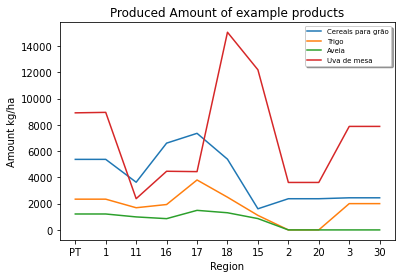

In [6]:
plt.plot(production_data["2021"]['Cereais para grão'], label = "Cereais para grão")
plt.plot(production_data["2021"]['Trigo'], label = "Trigo")
plt.plot(production_data["2021"]['Aveia'], label = "Aveia")
plt.plot(production_data["2021"]['Uva de mesa'], label = "Uva de mesa")

plt.title('Produced Amount of example products')
plt.xlabel('Region')
plt.ylabel('Amount kg/ha')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')

plt.show()

#### To make a combination with the weather data and accessibility easier, we change the dataframe structure to have the region and years as row index and the product as column index. Bring the wide format to a long format.

In [7]:
production_data = production_data.iloc[:,1:].stack(0)
production_data = production_data.rename_axis(['Region', 'year'])
production_data

Product     Abacate Abóbora (inclui butternut) Alface Alho Alho-porro  Ameixa  \
Region year                                                                     
PT     1986     NaN                        NaN    NaN  NaN        NaN    6006   
       1987     NaN                        NaN    NaN  NaN        NaN    6266   
       1988     NaN                        NaN    NaN  NaN        NaN    5173   
       1989     NaN                        NaN    NaN  NaN        NaN    5769   
       1990     NaN                        NaN    NaN  NaN        NaN    6436   
...             ...                        ...    ...  ...        ...     ...   
30     2017     NaN                        NaN    NaN  NaN        NaN    7529   
       2018       0                        NaN    NaN  NaN        NaN    7760   
       2019    8243                        NaN    NaN  NaN        NaN    8339   
       2020    9164                        NaN    NaN  NaN        NaN    5880   
       2021    9726                        NaN    NaN  NaN        NaN    5018   

Product     Amoras  Amêndoa Ananás  Arroz  ...  Trigo Trigo duro  Trigo mole  \
Region year                                ...                                 
PT     1986    NaN      848    NaN   4463  ...   1630       1250        1669   
       1987    NaN      996    NaN   4322  ...   1694       1355        1727   
       1988    NaN      506    NaN   4266  ...   1380        789        1425   
       1989    NaN     1237    NaN   4290  ...   1915       1197        1977   
       1990    NaN     1098    NaN   4614  ...   1429       1270        1445   
...            ...      ...    ...    ...  ...    ...        ...         ...   
30     2017    NaN        0      0      0  ...   1986          0        1986   
       2018      0        0      0      0  ...   1986          0        1986   
       2019      0        0      0      0  ...   2002          0        2002   
       2020      0        0      0      0  ...   1988          0        1988   
       2021      0        0      0      0  ...   2002          0        2002   

Product      Triticale  Uva de mesa Uva para vinho  Uva para vinho (DOP)  \
Region year                                                                
PT     1986       1405         6720           4122                   NaN   
       1987       1410         7702           5765                   NaN   
       1988       1237         3179           1965                   NaN   
       1989       1666         5517           3963                   NaN   
       1990       1244         5740           5806                   NaN   
...                ...          ...            ...                   ...   
30     2017          0         7881           5490                   NaN   
       2018          0         7881           4386                   NaN   
       2019          0         7881           6224                   NaN   
       2020          0         7883           5980                   NaN   
       2021          0         7883           6474                   NaN   

Product      Uva para vinho (IGP)  Uva para vinho (Vinhos sem certificação)  \
Region year                                                                   
PT     1986                   NaN                                       NaN   
       1987                   NaN                                       NaN   
       1988                   NaN                                       NaN   
       1989                   NaN                                       NaN   
       1990                   NaN                                       NaN   
...                           ...                                       ...   
30     2017                   NaN                                       NaN   
       2018                   NaN                                       NaN   
       2019                   NaN                                       NaN   
       2020                   NaN              

#### Now we can get each data for a region in long format, just by addressing the region index.

In [ ]:
production_data.loc['PT']

### 2. Data import of weather data

#### Import the weather data from all excel sheets. Each sheet contains a table for meta info, min temperature, max temperature and precipitation. First we extract the filenames that are in the local folder (workingdirectory\\IPMA). In this way we can automate the import even if new excel sheets for other stations are added to that folder. From the file name, we can extract the station identificator, as the sheets are labeled beginning with the station id.

In [8]:
file_path = os.getcwd()
data_path=file_path+'\\'+'IPMA'
file_names=[".".join(f.split(".")[:-1]) for f in listdir(data_path) if isfile (join(data_path,f))] 
full_file_names=[f for f in listdir(data_path) if isfile (join(data_path,f))]

tmin_names = []
tmax_names = []
prec_names = []
meta_names = []
station_names = []
for i in range(len(full_file_names)):
    tmin_names.append('tmin_station_'+full_file_names[i].split("-")[0]) 
    tmax_names.append('tmax_station_'+full_file_names[i].split("-")[0]) 
    prec_names.append('prec_station_'+full_file_names[i].split("-")[0])
    meta_names.append('meta_station_'+full_file_names[i].split("-")[0])
    station_names.append('station_'+full_file_names[i].split("-")[0])

print('The following excel sheets are in the local folder:',full_file_names)
print()
print('Therefore', len(full_file_names), 'data sheets about the stations with names', station_names, 'will be imported.')

The following excel sheets are in the local folder: ['11-tx-tn-prec.xlsx', '132-tx-tn-prec.xlsx', '170-tx-tn-prec.xlsx', '205-tx-tn-prec.xlsx', '320-tx-tn-prec.xlsx', '360-tx-tn-prec.xlsx', '522-tx-tn-prec.xlsx', '535-tx-tn-prec.xlsx', '546-tx-tn-prec.xlsx', '549-tx-tn-prec.xlsx', '554-tx-tn-prec.xlsx', '557-tx-tn-prec.xlsx', '562-tx-tn-prec.xlsx', '568-tx-tn-prec.xlsx', '571-tx-tn-prec.xlsx', '575-tx-tn-prec.xlsx']

Therefore 16 data sheets about the stations with names ['station_11', 'station_132', 'station_170', 'station_205', 'station_320', 'station_360', 'station_522', 'station_535', 'station_546', 'station_549', 'station_554', 'station_557', 'station_562', 'station_568', 'station_571', 'station_575'] will be imported.


#### Now the needed tables are imported for all stations and all sheets (meta, tmin, tmax, prec). The data is combined into one dataframe for each station, that can be addressed by station_'staion number'. Additionally all rows are dropped, where there is no value for each month. And the column index for December is overwritten, as the coding is different for the temperature sheets and precipitation (Dez != Dec).

In [9]:
z=0
files_ready=[]

for mi, ma, prec, meta, r, s in zip(tmin_names, tmax_names, prec_names, meta_names, full_file_names, station_names):
    globals()[mi]=pd.read_excel(data_path+'\\'+r, sheet_name = 'tmin', usecols = range(0,13))
    globals()[ma]=pd.read_excel(data_path+'\\'+r, sheet_name = 'tmax', usecols = range(0,13))
    globals()[prec]=pd.read_excel(data_path+'\\'+r, sheet_name = 'prec', usecols = range(0,13))
    globals()[meta]=pd.read_excel(data_path+'\\'+r, sheet_name = 'meta', usecols = range(0,2))
    globals()[mi].index =  globals()[mi]['year']
    globals()[ma].index =  globals()[ma]['year']
    globals()[prec].index =  globals()[prec]['year']
    globals()[mi] = globals()[mi].drop(columns = ["year"])
    globals()[ma] = globals()[ma].drop(columns = ["year"])
    globals()[prec] = globals()[prec].drop(columns = ["year"])
    globals()[ma] = globals()[ma].set_axis(globals()[mi].columns, axis=1, inplace=False)
    globals()[s] = pd.concat([globals()[mi], globals()[ma], globals()[prec]], keys=['tmin', 'tmax', 'prec'], axis=1).reorder_levels([1,0],axis=1)
    globals()[s] = globals()[s].dropna(how='all')
    globals()[s] = globals()[s].rename({'Dez': 'Dec'}, axis=1)
    files_ready.append(s)
    z+=1
    
print(files_ready, 'were imported as dataframes.')
station_11

['station_11', 'station_132', 'station_170', 'station_205', 'station_320', 'station_360', 'station_522', 'station_535', 'station_546', 'station_549', 'station_554', 'station_557', 'station_562', 'station_568', 'station_571', 'station_575'] were imported as dataframes.


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,tmin,tmin,tmin,tmin,tmin,tmin,tmin,tmin,tmin,tmin,...,prec,prec,prec,prec,prec,prec,prec,prec,prec,prec
year,,,,,,,,,,,,,,,,,,,,,
1879,1.600000,1.000000,1.700000,1.100000,3.200000,7.000000,9.400000,10.800000,8.200000,6.400000,...,45.4,126.5,9.3,102.6,2.2,1.0,78.8,79.9,203.0,54.6
1880,-1.800000,0.500000,3.400000,1.200000,4.500000,5.800000,9.200000,10.900000,10.200000,7.500000,...,57.1,167.2,146.2,43.8,10.2,15.6,34.6,262.8,129.2,113.4
1881,-1.500000,1.800000,3.900000,3.300000,5.500000,8.500000,13.400000,12.500000,9.000000,4.800000,...,149.4,166.8,56.0,28.4,28.8,9.8,93.8,207.2,73.6,112.2
1882,0.200000,0.700000,2.300000,2.600000,4.700000,7.000000,9.000000,11.800000,7.100000,3.500000,...,33.6,159.6,143.6,18.8,34.8,2.8,59.2,153.8,108.0,139.6
1883,0.600000,0.500000,-1.700000,1.800000,3.800000,5.800000,8.100000,11.800000,8.400000,4.300000,...,140.0,100.8,116.2,51.4,4.4,0.0,27.0,68.2,58.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.032258,-0.621429,2.141935,4.526667,6.674194,10.456667,11.787097,10.251613,7.953333,6.896774,...,5.3,91.4,108.4,72.9,1.0,22.0,126.5,261.1,66.3,198.9
2016,1.806452,0.900000,0.641935,2.350000,6.164516,9.120000,12.516129,12.593548,9.756667,7.261290,...,168.8,241.5,220.8,27.9,4.6,1.7,31.2,97.5,157.7,53.5


#### We can obtain some first statistics. For example, the average of the minimum temperature measured by station 11 in March was nearly 2 degrees.

In [ ]:
station_11.describe()

#### Now, we can look at the data graphically: Plot the max temperature for January and October, that was measured by station 360. As we would expect, the maximum temperature in October was always higher than that in January.

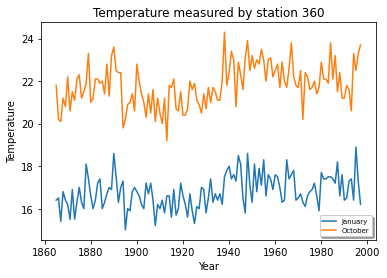

In [10]:
plt.plot(station_360['Jan']['tmax'], label = "January")
plt.plot(station_360['Oct']['tmax'], label = "October")
plt.title('Temperature measured by station 360')
plt.xlabel('Year')
plt.ylabel('Temperature')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-small')
plt.show()

#### Plot the precipitation for January and June, that was measured by station 360.

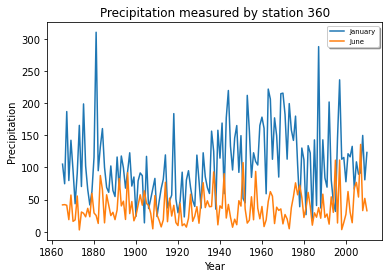

In [11]:
plt.plot(station_360['Jan']['prec'], label = "January")
plt.plot(station_360['Jun']['prec'], label = "June")
plt.title('Precipitation measured by station 360')
plt.xlabel('Year')
plt.ylabel('Precipitation')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
plt.show()

#### We can also plot the temperature with average in December. A slight positive trend in the last 140 years visible?

In [ ]:
month = 'Dec'
fig, ax = plt.subplots()
ax.fill_between(station_360[month].index, station_360[month]['tmin'], station_360[month]['tmax'], alpha=.5, linewidth=0, label = "Min/Max")
ax.plot(station_360[month].index, (station_360[month]['tmin'] + station_360[month]['tmax'])/2, linewidth=2, label = "Average")
plt.title('Temperature measured by station 360 in '+month)
plt.xlabel('Year')
plt.ylabel('Temperature')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

#### And plot the minimum temperature of station 557 for two whole years, to compare.

In [ ]:
plt.plot(station_557.loc[1950].iloc[:12].values, label = '1950')
plt.plot(station_557.loc[2005].iloc[:12].values, label = '2005')
plt.title('Min Temperature measured by station 557')
plt.xlabel('Month')
plt.ylabel('Min Temperature')
legend = plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

#### At the end, we want to map the weather stations to their regions. By comparing the meta information of each station with the geographical description of a region, we map one weather station to each region (except 'PT' and 'Continente'). The weather data is structured in one dataframe, that has the same format as the production dataframe. This makes computation in later cases easier.

In [13]:
weather_data = pd.concat([station_546, station_549, station_535, station_170, station_554, station_320, station_522], keys=["11", "16", "17", "18", "15", "2", "3"])
weather_data.index.set_names('Region', level=0, inplace = True)
weather_data

Jan        Feb        Mar        Apr        May        Jun  \
               tmin       tmin       tmin       tmin       tmin       tmin   
Region year                                                                  
11     1863   5.800   6.900000   9.000000  12.000000  13.100000  14.800000   
       1864   6.600   6.300000   8.400000  11.600000  16.000000  16.900000   
       1865   8.300   7.400000   6.800000  12.800000  13.200000  19.400000   
       1866   7.500   7.800000   7.300000  10.500000  13.100000  15.100000   
       1867   8.000   8.800000   9.600000  11.800000  12.600000  17.200000   
...             ...        ...        ...        ...        ...        ...   
3      2014  14.975  13.832143  13.935714  14.882143  16.482143  17.817857   
       2015  13.800  13.300000  13.500000  14.800000  17.000000  17.700000   
       2016  16.000  14.500000  14.100000  15.300000  15.700000  19.000000   
       2017  15.000  14.200000  14.500000  16.000000  17.200000  19.300000   
       2018  14.500  13.500000  15.200000  15.300000  16.100000  18.400000   

                   Jul        Aug     Sep        Oct  ...    Mar    Apr  \
                  tmin       tmin    tmin       tmin  ...   prec   prec   
Region year                                           ...                 
11     1863  16.700000  16.800000  15.000  12.800000  ...  173.5    7.0   
       1864  17.400000  19.500000  15.700  13.500000  ...  134.5   58.0   
       1865  17.900000  16.200000  18.500  13.800000  ...   57.0   61.0   
       1866  17.200000  18.500000  14.600  13.500000  ...  181.7  232.7   
       1867  17.000000  16.500000  15.500  11.900000  ...  404.6   31.6   
...                ...        ...     ...        ...  ...    ...    ...   
3      2014  19.296429  20.857143  20.725  20.360714  ...   38.0   58.4   
       2015  21.000000  21.400000  21.000  19.200000  ...   38.9   33.1   
       2016  19.600000  21.400000  20.800  19.200000  ...   19.3  122.9   
       2017  20.000000  21.000000  20.500  20.500000  ...   31.8  104.6   
       2018  19.700000  20.900000  20.900  19.200000  ...  163.5   29.7   

               May   Jun   Jul   Aug    Sep    Oct    Nov    Dec  
              prec  prec  prec  prec   prec   prec   prec   prec  
Region year                                                       
11     1863   83.0  46.0   3.0  55.0   33.5  197.5   14.5   13.5  
       1864   47.0  56.0   0.0  19.0  194.0  274.2  223.5  149.5  
       1865   40.5  41.0   4.0  14.0   96.0  489.3  255.5  123.5  
       1866  338.5  51.0  56.8  17.3   67.7   60.4   12.8   75.6  
       1867  243.3  43.0  21.2  41.6   19.0   65.0  119.0   69.8  
...            ...   ...   ...   ...    ...    ...    ...    ...  
3      2014    0.0   6.7   0.0   0.0   88.7   95.3  111.5   16.1  
       2015    5.1   0.2   1.2   0.0   43.5  135.1    1.5   25.5  
       2016   27.1   0.6   0.0   0.5    0.2  131.7  163.1   69.3  
       2017   38.8   0.0   0.0   0.0    0.0   15.0   58.9   25.0  
       2018    0.7   0.1   0.4   0.0    0.0   99.1   83.7   12.1  

[864 rows x 36 columns]

#### We can visualize the minimum temperature in Madeira over the last 100 years in a heatmap. It shows that especially in the summer months, the temperatures got higher in the last 15 years. Possibly climate change?

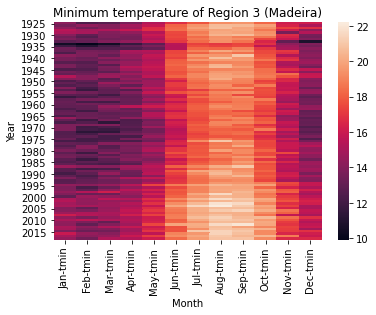

In [21]:
sns.heatmap(weather_data.loc['3'].iloc[60:,:12])
plt.title('Minimum temperature of Region 3 (Madeira)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Project 2: Exploratory Data Analysis


After we imported all data and built up the dataframes, we want to look at the data more closely. With exploratory visualization, first relations and properties of the data might be exposed. Therefore, we examine time-series, correlations and other developments that are present in the data.

In [ ]:
production_data.info()

In [ ]:
production_data.describe()

In [ ]:
weather_data.describe()

#### Average (over regions) minimum and maximum temperature in each month: We can observe, that months July, August and September are the hottest months of the year. In the heatmap for the average maximum temperature, we can obtain that the average temperature increased since 1990 (more white spots).

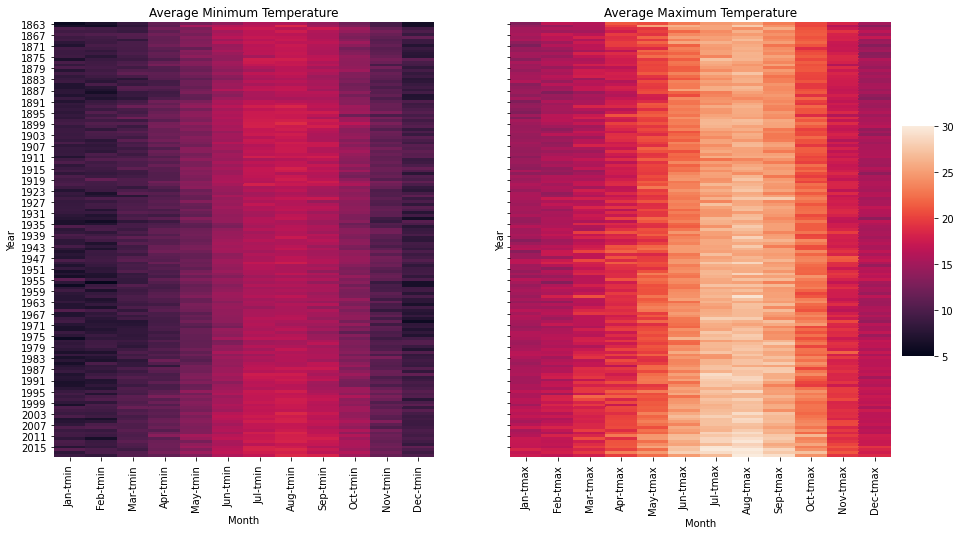

In [15]:
idx = pd.IndexSlice

plot, plots = plt.subplots(1,2, figsize=(15,8), sharey=True)
cbar_ax = plot.add_axes([.91, .3, .03, .4])
sns.heatmap(weather_data.groupby('year').mean().loc[:, idx[:,'tmin']], ax = plots[0],cbar=True,vmin=5,vmax=32,cbar_ax = cbar_ax)
plots[0].set(xlabel='Month', ylabel='Year')
plots[0].set_title("Average Minimum Temperature")
sns.heatmap(weather_data.groupby('year').mean().loc[:, idx[:,'tmax']], ax = plots[1],cbar=True,vmin=5,vmax=30,cbar_ax = cbar_ax)
plots[1].set(xlabel='Month', ylabel='Year')
plots[1].set_title("Average Maximum Temperature")
plt.show(plot)

#### Average of the temperature and precipitation over all years. We observe that the minimum temperature in region 2 (Acores) and 3 (Madeira) is the highest, but they dont have the highest maximum temperature over the year. Here region 18 (Alentejo) and 15 (Algarve) are the hottest regions in Portugal.

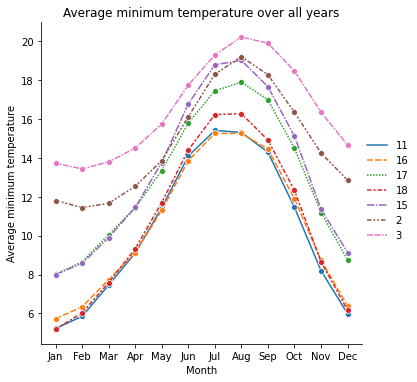

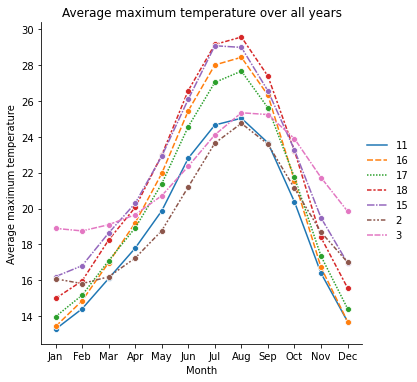

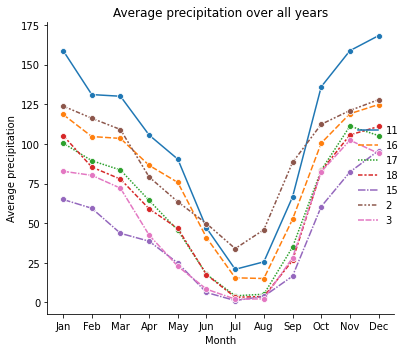

In [22]:
avg_tmin = weather_data.groupby('Region').mean().loc[:, idx[:,'tmin']].T
avg_tmin = avg_tmin.unstack(1).reindex(avg_tmin.index.get_level_values(0))

avg_tmax = weather_data.groupby('Region').mean().loc[:, idx[:,'tmax']].T
avg_tmax = avg_tmax.unstack(1).reindex(avg_tmax.index.get_level_values(0))

avg_prec = weather_data.groupby('Region').mean().loc[:, idx[:,'prec']].T
avg_prec = avg_prec.unstack(1).reindex(avg_prec.index.get_level_values(0))

p1 = sns.relplot(data=avg_tmin, kind='line', marker='o')
plt.title('Average minimum temperature over all years')
plt.xlabel('Month')
plt.ylabel('Average minimum temperature')

p2 = sns.relplot(data=avg_tmax, kind='line', marker='o')
plt.title('Average maximum temperature over all years')
plt.xlabel('Month')
plt.ylabel('Average maximum temperature')

p3 = sns.relplot(data=avg_prec, kind='line', marker='o')
plt.title('Average precipitation over all years')
plt.xlabel('Month')
plt.ylabel('Average precipitation')

plt.tight_layout()

#### Correlations between the weather data. We observe a strong positive correlation of the minimum temperature. The precipitation is strongly negative correlated with the maximum temperature. 

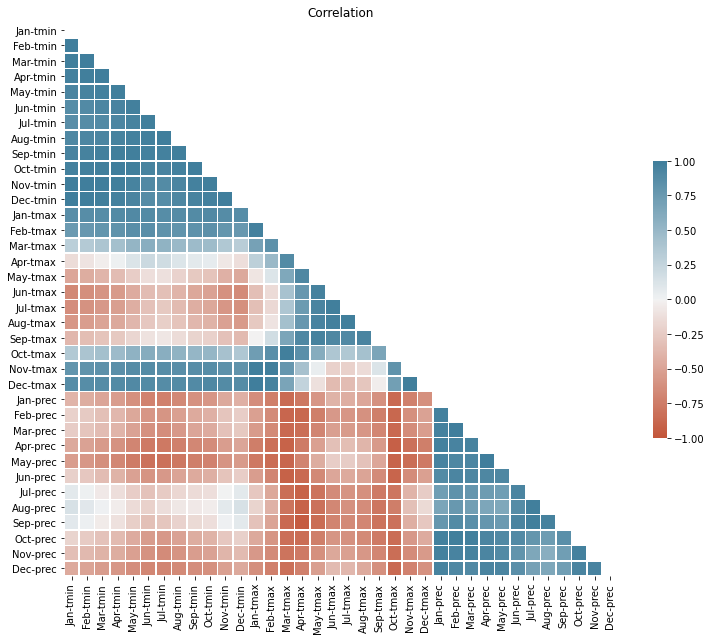

In [25]:
corr = weather_data.groupby('Region').mean().corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()

#### Difference between tmax and tmin (range of the temperature). We observe, that the temperature ranges were the biggest in the summer months (June - September), where there was also more variance in the data.

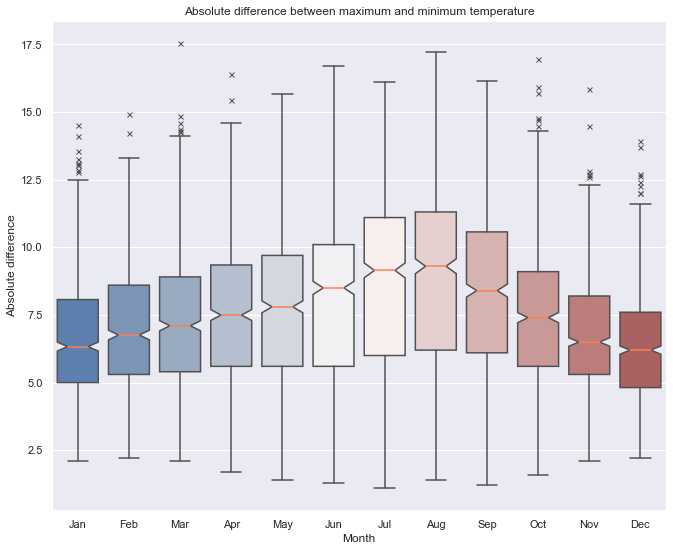

In [31]:
anew = weather_data.loc[:, idx[:,'tmax']].values-weather_data.loc[:, idx[:,'tmin']].values
anew1 = pd.DataFrame(anew, columns=[i[0] for i in weather_data.loc[:, idx[:,'tmax']].columns], index = weather_data.loc[:, idx[:,'tmax']].index)
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11,9)})
p1 = sns.boxplot(data=anew1, notch=True,flierprops={"marker": "x"}, medianprops={"color": "coral"}, palette="vlag")
#p2 = sns.stripplot(data=anew1, size=1, color=".5", linewidth=0)

plt.title('Absolute difference between maximum and minimum temperature')
plt.xlabel('Month')
plt.ylabel('Absolute difference')
plt.show()

#### Closer look on differences between tmax and tmin in each region. Especially region 2 and 3 have always smaller differences and dont increase in the summer months. Regions 16 and 18 have the biggest increase.

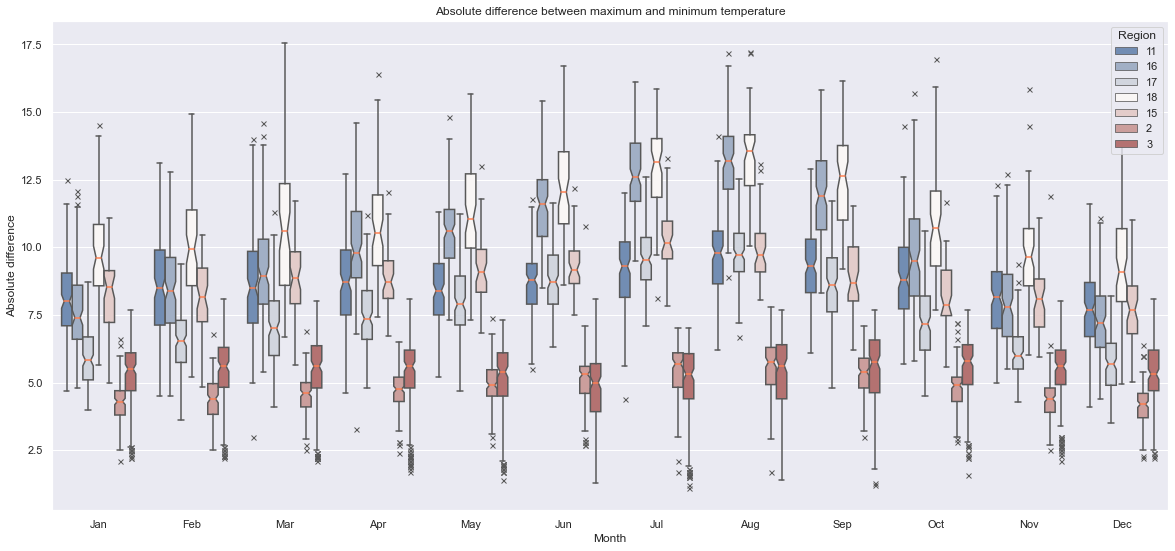

In [32]:
anew1.reset_index(inplace=True)
anew2 = pd.melt(anew1, id_vars=['year', 'Region'], value_vars=anew1.columns[2:])
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(20,9)})
p1 = sns.boxplot(x = 'variable', y = 'value', data=anew2, hue = 'Region', notch=True,flierprops={"marker": "x"}, medianprops={"color": "coral"}, palette="vlag")

plt.title('Absolute difference between maximum and minimum temperature')
plt.xlabel('Month')
plt.ylabel('Absolute difference')
plt.show()

#### Precipitation. We observe, that the precipitation is the lowest in the summer months. The regions 2 and 3 have the lowest precipitation.

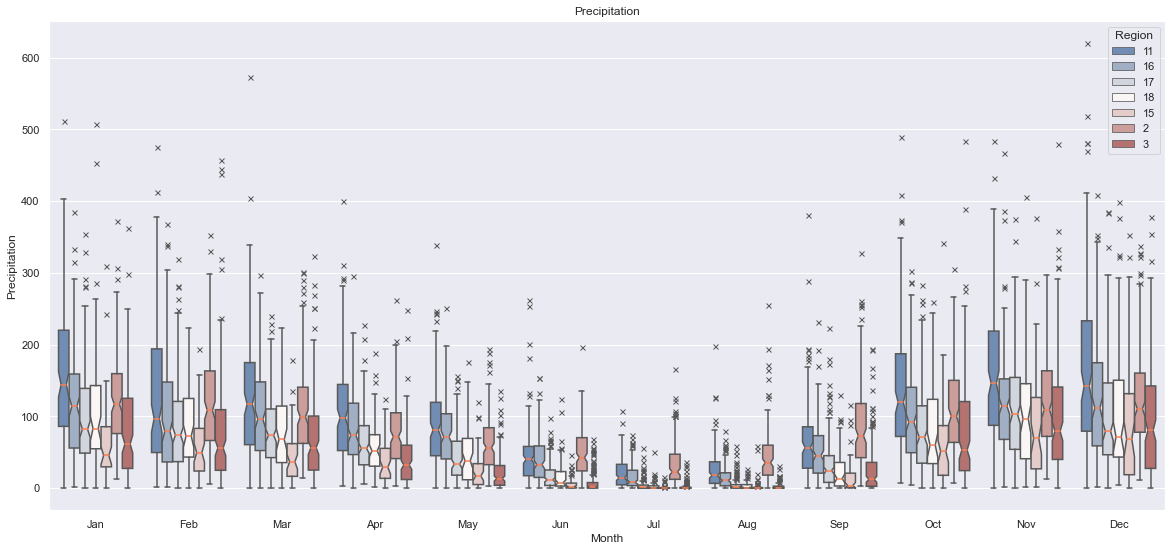

In [36]:
prec1 = weather_data.loc[:, idx[:,'prec']]
prec1.reset_index(inplace=True)
prec1.columns = [i[0] for i in prec1.columns]
prec1 = pd.melt(prec1, id_vars=['year', 'Region'], value_vars=prec1.columns[2:])
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(20,9)})
p1 = sns.boxplot(x = 'variable', y = 'value', data=prec1, hue = 'Region', notch=True,flierprops={"marker": "x"}, medianprops={"color": "coral"}, palette="vlag")
#p2 = sns.stripplot(data=anew1, size=1, color=".5", linewidth=0)

plt.title('Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.show()

#### Different visualization of the precipitation.

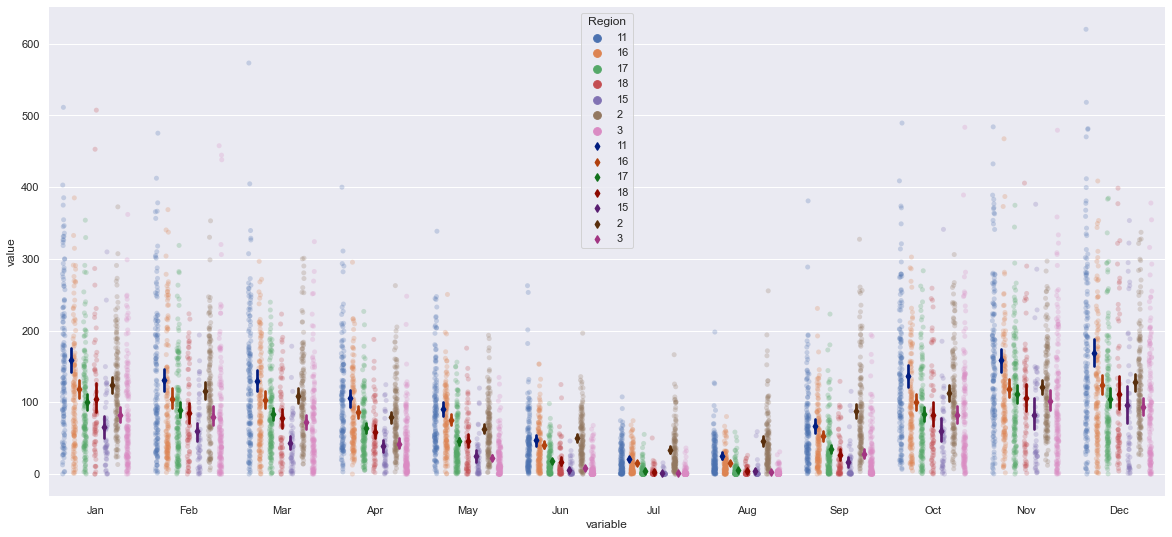

In [39]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(
    data=prec1, x = 'variable', y = 'value', hue="Region",
    dodge=True, alpha=.25, zorder=1#, legend=False
)
sns.pointplot(
    data=prec1, x = 'variable', y = 'value', hue="Region",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

plt.show()

#### Correlations with production data. 

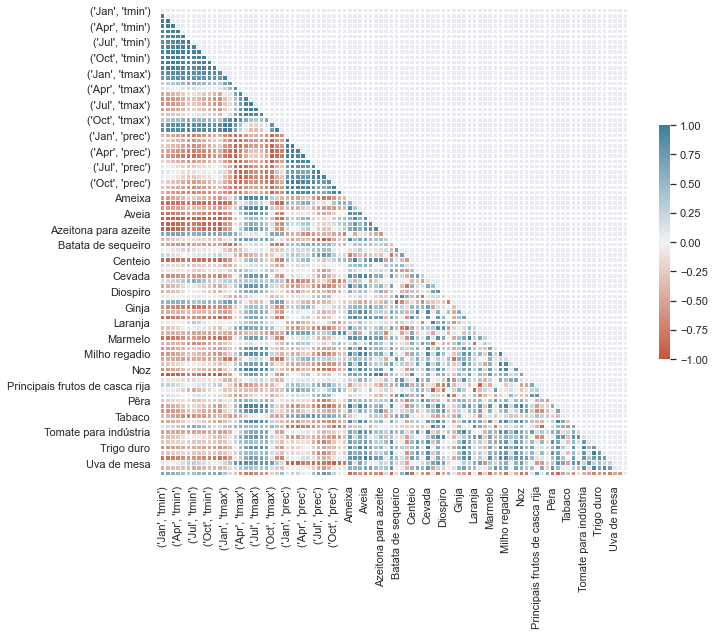

In [42]:
conc_grouped = pd.concat([weather_data.groupby('Region').mean(), production_data.groupby('Region').mean()], axis=1, join="inner")
corr = conc_grouped.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()

#### Production data time-series of product 'Ameixa' in all regions.

[]

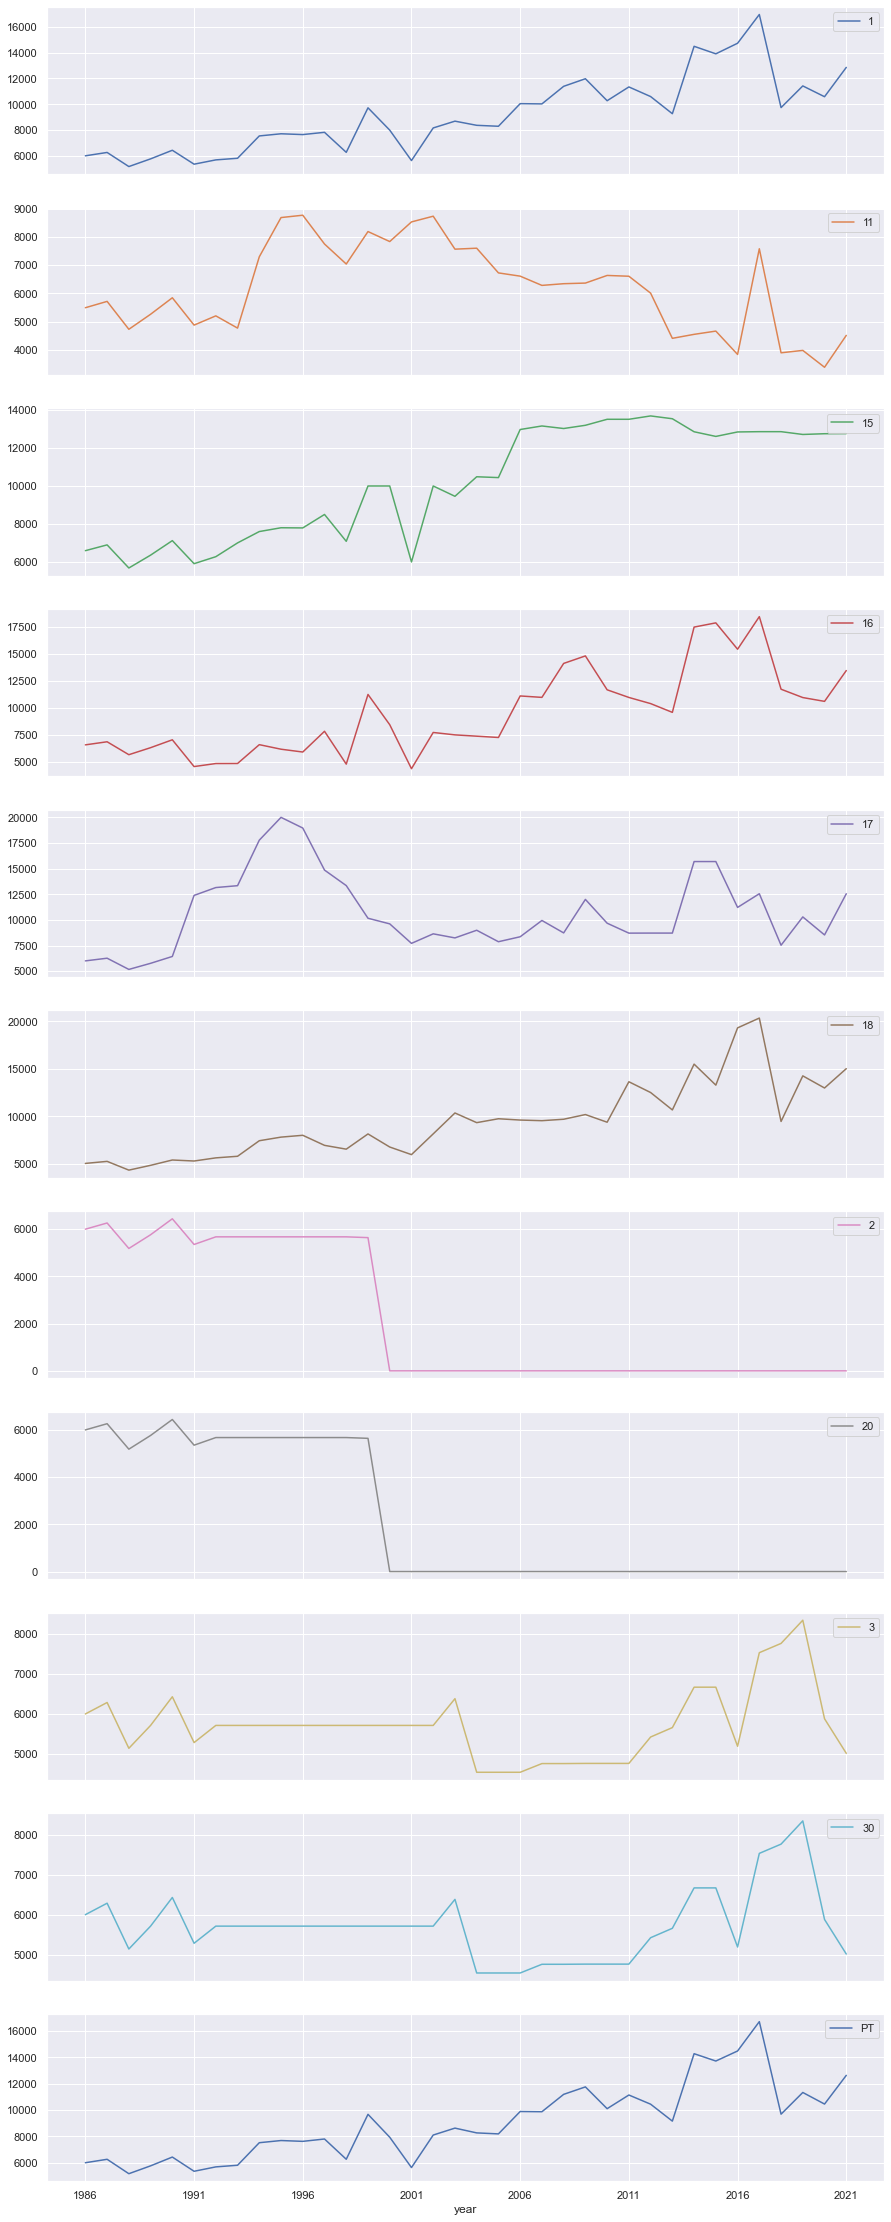

In [43]:
production_data.unstack(level=0)['Ameixa'].plot(kind='line', subplots=True, rot=0, figsize=(15, 40))
plt.plot()